# Understanding Cicles in the Brazilian Stock Market

In [1]:
import MetaTrader5 as mt5
import pandas as pd

In [2]:
mt5.initialize()

login = 3014967797
password = 'kSS2FF5#'
server = 'Rico-DEMO'

mt5.login(login, password, server)

symbol = "BBAS3F"

timeframe = mt5.TIMEFRAME_D1
df = pd.DataFrame(mt5.copy_rates_from_pos(symbol, timeframe, 0, 10000))
df['time'] = pd.to_datetime(df['time'], unit='s') 

In [3]:
df

,time,open,high,low,close,tick_volume,spread,real_volume
0,2019-09-25,45.85,45.97,44.83,45.56,2196,1,36918
1,2019-09-26,45.62,46.20,45.24,45.89,1648,1,28241
2,2019-09-27,45.55,46.07,45.28,45.50,1388,1,21554
3,2019-09-30,45.50,45.89,45.49,45.58,1391,1,22335
4,2019-10-01,45.60,45.80,44.83,45.00,2921,1,34084
...,...,...,...,...,...,...,...,...
1241,2024-09-19,28.38,28.48,27.95,27.95,21138,1,228408
1242,2024-09-20,27.90,27.91,27.47,27.52,30886,1,357325
1243,2024-09-23,27.52,27.68,27.29,27.40,30673,1,284038
1244,2024-09-24,27.72,27.91,27.38,27.51,21380,1,229260


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   time         1246 non-null   datetime64[ns]
 1   open         1246 non-null   float64       
 2   high         1246 non-null   float64       
 3   low          1246 non-null   float64       
 4   close        1246 non-null   float64       
 5   tick_volume  1246 non-null   uint64        
 6   spread       1246 non-null   int32         
 7   real_volume  1246 non-null   uint64        
dtypes: datetime64[ns](1), float64(4), int32(1), uint64(2)
memory usage: 73.1 KB


In [5]:
data = {
        'Symbol': mt5.symbol_info(symbol).name,
        'Bid': mt5.symbol_info(symbol).bid,
        'Ask': mt5.symbol_info(symbol).ask,
        'Last Price': mt5.symbol_info(symbol).last,
        'Session Open': mt5.symbol_info(symbol).session_open,
        'Session Close': mt5.symbol_info(symbol).session_close,
        'Volume': mt5.symbol_info(symbol).volume,
        'Volume Real': mt5.symbol_info(symbol).volume_real,
        'Price Change': mt5.symbol_info(symbol).price_change,
        'Price Volatility': mt5.symbol_info(symbol).price_volatility,
    }

    # Criar o DataFrame
df_current_data = pd.DataFrame(data, index=[0])

In [6]:
df_current_data 

,Symbol,Bid,Ask,Last Price,Session Open,Session Close,Volume,Volume Real,Price Change,Price Volatility
0,BBAS3F,27.44,27.45,27.45,27.3,27.38,24,24.0,0.2557,0.0


# Adding indicators


In [7]:

df['MA_9'] = df['close'].rolling(window=9).mean()     # Curto prazo
df['MA_50'] = df['close'].rolling(window=50).mean()   # Médio prazo
df['MA_200'] = df['close'].rolling(window=200).mean() # Longo prazo


In [8]:
# Calculando o MACD
df['EMA_12'] = df['close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


In [9]:
# Função para calcular o RSI
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Aplicando a função
df['RSI'] = calculate_rsi(df, window=14)


In [10]:
# Média Móvel de Volume para identificar mudanças
df['Volume_MA_20'] = df['real_volume'].rolling(window=20).mean()


In [11]:
df

,time,open,high,low,close,tick_volume,spread,real_volume,MA_9,MA_50,MA_200,EMA_12,EMA_26,MACD,Signal,RSI,Volume_MA_20
0,2019-09-25,45.85,45.97,44.83,45.56,2196,1,36918,NaN,NaN,NaN,45.560000,45.560000,0.000000,0.000000,NaN,NaN
1,2019-09-26,45.62,46.20,45.24,45.89,1648,1,28241,NaN,NaN,NaN,45.610769,45.584444,0.026325,0.005265,NaN,NaN
2,2019-09-27,45.55,46.07,45.28,45.50,1388,1,21554,NaN,NaN,NaN,45.593728,45.578189,0.015539,0.007320,NaN,NaN
3,2019-09-30,45.50,45.89,45.49,45.58,1391,1,22335,NaN,NaN,NaN,45.591616,45.578323,0.013292,0.008514,NaN,NaN
4,2019-10-01,45.60,45.80,44.83,45.00,2921,1,34084,NaN,NaN,NaN,45.500598,45.535485,-0.034887,-0.000166,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,2024-09-19,28.38,28.48,27.95,27.95,21138,1,228408,28.502222,27.7470,40.35240,28.429042,28.292772,0.136270,0.264669,47.258486,195078.85
1242,2024-09-20,27.90,27.91,27.47,27.52,30886,1,357325,28.326667,27.7608,40.21995,28.289190,28.235530,0.053660,0.222467,37.817259,206915.40
1243,2024-09-23,27.52,27.68,27.29,27.40,30673,1,284038,28.180000,27.7694,40.09195,28.152391,28.173639,-0.021247,0.173724,34.438776,213852.45
1244,2024-09-24,27.72,27.91,27.38,27.51,21380,1,229260,28.042222,27.7790,39.96020,28.053562,28.124480,-0.070918,0.124796,28.412256,218154.05


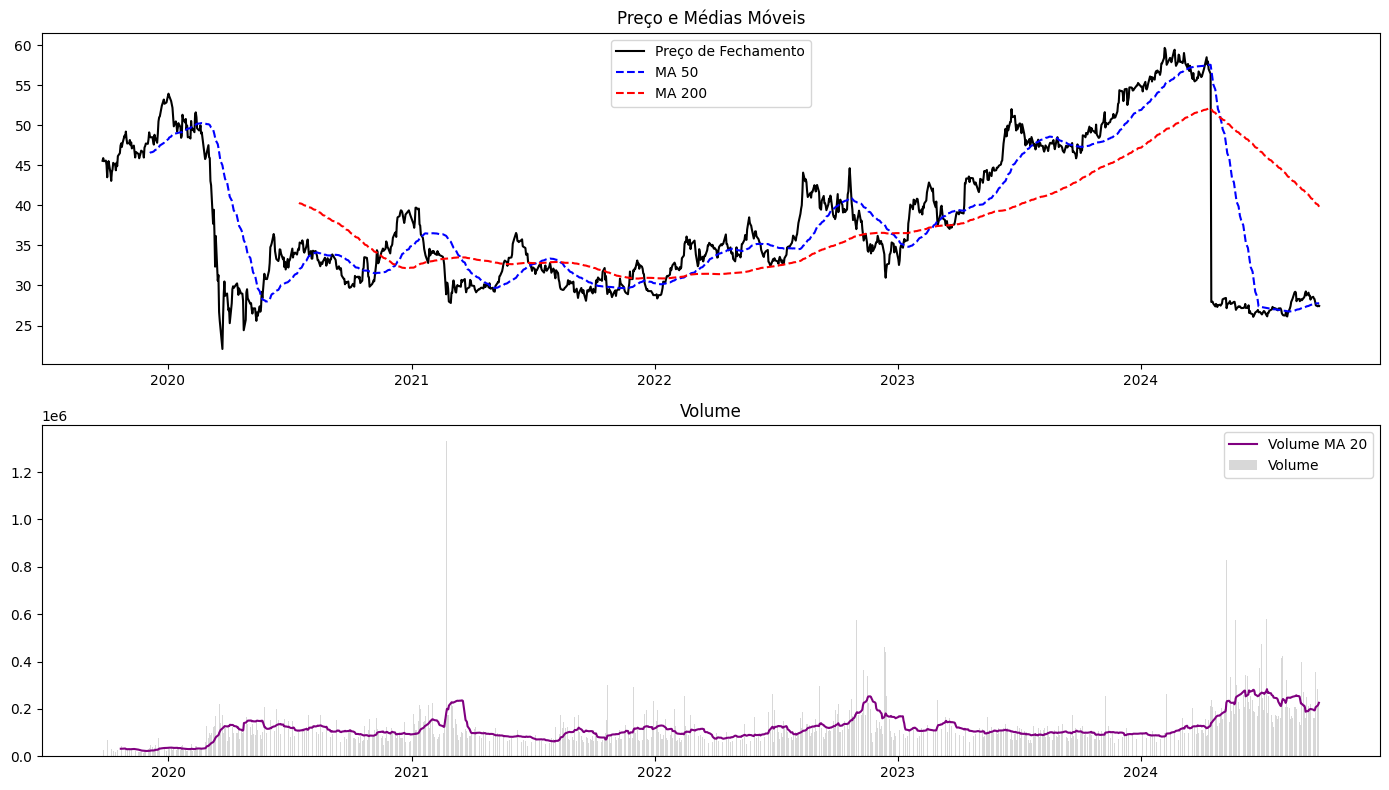

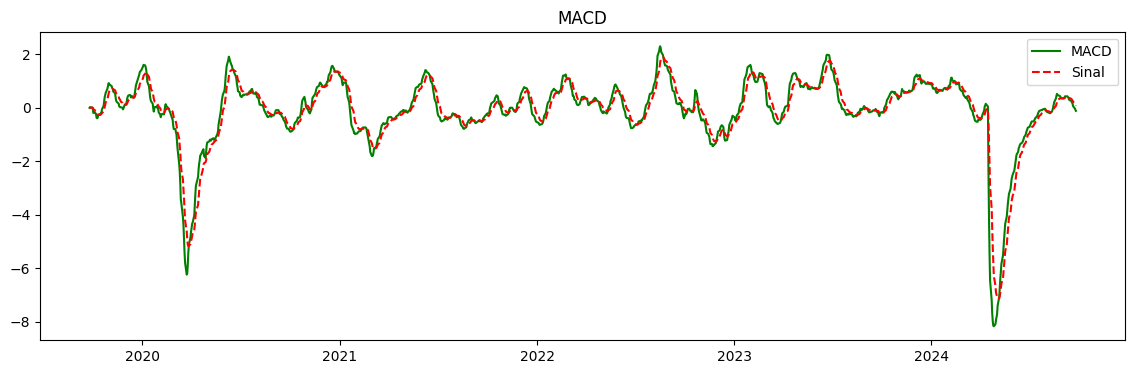

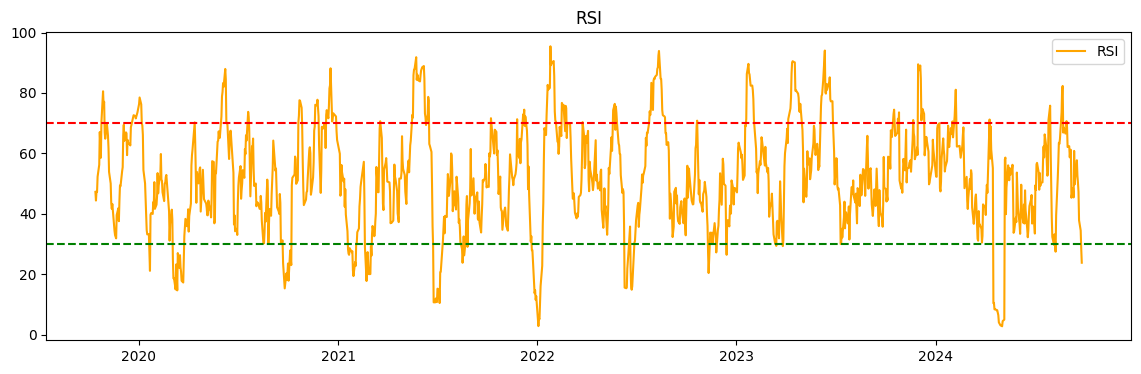

In [12]:
import matplotlib.pyplot as plt

# Plotando o preço de fechamento, médias móveis e volume
plt.figure(figsize=(14, 8))

# Preço de fechamento e médias móveis
plt.subplot(2, 1, 1)
plt.plot(df['time'], df['close'], label='Preço de Fechamento', color='black')
plt.plot(df['time'], df['MA_50'], label='MA 50', color='blue', linestyle='--')
plt.plot(df['time'], df['MA_200'], label='MA 200', color='red', linestyle='--')
plt.title('Preço e Médias Móveis')
plt.legend()

# Volume e média de volume
plt.subplot(2, 1, 2)
plt.bar(df['time'], df['real_volume'], label='Volume', color='grey', alpha=0.3)
plt.plot(df['time'], df['Volume_MA_20'], label='Volume MA 20', color='purple')
plt.title('Volume')
plt.legend()

plt.tight_layout()
plt.show()

# Gráfico do MACD
plt.figure(figsize=(14, 4))
plt.plot(df['time'], df['MACD'], label='MACD', color='green')
plt.plot(df['time'], df['Signal'], label='Sinal', color='red', linestyle='--')
plt.title('MACD')
plt.legend()
plt.show()

# Gráfico do RSI
plt.figure(figsize=(14, 4))
plt.plot(df['time'], df['RSI'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('RSI')
plt.legend()
plt.show()


# Testing


In [13]:
df.info()
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   time          1246 non-null   datetime64[ns]
 1   open          1246 non-null   float64       
 2   high          1246 non-null   float64       
 3   low           1246 non-null   float64       
 4   close         1246 non-null   float64       
 5   tick_volume   1246 non-null   uint64        
 6   spread        1246 non-null   int32         
 7   real_volume   1246 non-null   uint64        
 8   MA_9          1238 non-null   float64       
 9   MA_50         1197 non-null   float64       
 10  MA_200        1047 non-null   float64       
 11  EMA_12        1246 non-null   float64       
 12  EMA_26        1246 non-null   float64       
 13  MACD          1246 non-null   float64       
 14  Signal        1246 non-null   float64       
 15  RSI           1233 non-null   float64 

In [14]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Selecionando as colunas de entrada relevantes para prever regimes
features = ['close', 'MA_9', 'MA_50', 'MA_200', 'EMA_12', 'EMA_26', 'MACD', 'Signal', 'RSI', 'Volume_MA_20']

# Preenchendo valores nulos
df.fillna(method='ffill', inplace=True)

# Normalizando as colunas selecionadas
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[features])

# Preparando os dados para a LSTM
X, y = [], []
n_steps = 60  # Quantidade de dias usados para prever o próximo estado
for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i - n_steps:i])  # Janela de observações de 60 dias
    y.append(df['close'].iloc[i])  # A saída aqui é o fechamento futuro, mas pode ser ajustado conforme o objetivo

X, y = np.array(X), np.array(y)

# Construção do modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilação e treino
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X, y, epochs=20, batch_size=32)


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_22760\1188884313.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)


Epoch 1/20
31/31 [==============================] - 2s 14ms/step - loss: 1226.6040
Epoch 2/20
31/31 [==============================] - 0s 14ms/step - loss: 850.5273
Epoch 3/20
31/31 [==============================] - 0s 13ms/step - loss: 721.3940
Epoch 4/20
31/31 [==============================] - 0s 13ms/step - loss: 636.4987
Epoch 5/20
31/31 [==============================] - 0s 14ms/step - loss: 559.6447
Epoch 6/20
31/31 [==============================] - 0s 13ms/step - loss: 495.7215
Epoch 7/20
31/31 [==============================] - 0s 13ms/step - loss: 439.2837
Epoch 8/20
31/31 [==============================] - 0s 14ms/step - loss: 389.0493
Epoch 9/20
31/31 [==============================] - 0s 14ms/step - loss: 344.9102
Epoch 10/20
31/31 [==============================] - 0s 14ms/step - loss: 306.6711
Epoch 11/20
31/31 [==============================] - 0s 14ms/step - loss: 272.5647
Epoch 12/20
31/31 [==============================] - 0s 14ms/step - loss: 243.1736
Epoch 13/20


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Criando a variável de saída 'regime' (exemplo de classificação binária)
df['regime'] = np.where(df['MACD'] > df['Signal'], 1, 0)  # 1 para alta, 0 para baixa

# Selecionando as colunas de entrada
X = df[features].fillna(method='ffill').values
y = df['regime'].values

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Avaliando a performance do modelo
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


C:\Users\Guilherme\AppData\Local\Temp\ipykernel_22760\3980111585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['regime'] = np.where(df['MACD'] > df['Signal'], 1, 0)  # 1 para alta, 0 para baixa


              precision    recall  f1-score   support

           0       0.96      0.88      0.91       104
           1       0.89      0.96      0.92       106

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.92      0.92      0.92       210



In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustando o modelo SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Avaliação
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.63      0.33      0.43       104
           1       0.55      0.81      0.66       106

    accuracy                           0.57       210
   macro avg       0.59      0.57      0.54       210
weighted avg       0.59      0.57      0.54       210



c:\Users\Guilherme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Guilherme\AppData\Local\Temp\ipykernel_22760\2804979798.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters


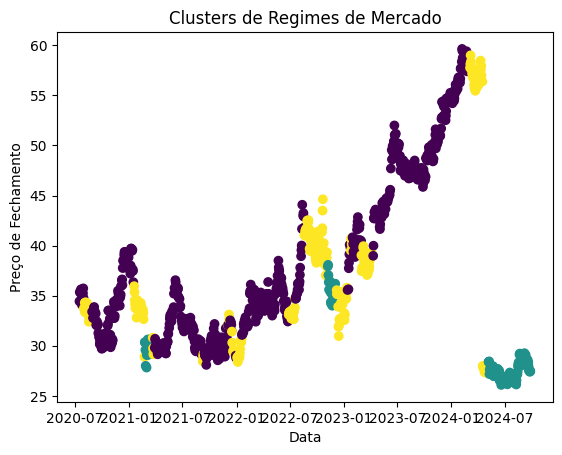

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Executando o modelo KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Por exemplo, 3 clusters para regimes "alta", "neutro", "baixa"
clusters = kmeans.fit_predict(X)

# Adicionando os clusters ao DataFrame
df['cluster'] = clusters

# Visualização
plt.scatter(df['time'], df['close'], c=clusters, cmap='viridis')
plt.xlabel("Data")
plt.ylabel("Preço de Fechamento")
plt.title("Clusters de Regimes de Mercado")
plt.show()
